Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Abby (Jingyi) Liu"

---

# Exercise 02 - Due Monday, October 01 at 1:00pm


**Objectives**:  Gain experience loading a CSV dataset into a database and using SQL to explore its contents.  Write and execute a number of SQL queries using common syntax and functions.

**Grading criteria**: All code cells should be executed with outputs, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.

For this assignment, you need **not** add narrative description to most of your queries (except where explicitly noted), although you may do so if something you see in the data prompts you.  If you do, add new text cells and use Markdown formatting.

**Deadline**: Monday, October 01, 1:00 pm.

**Suggestion**: if you have worked through the [Software Carpentry SQL lessons](http://swcarpentry.github.io/sql-novice-survey/) and have run through the last two lecture notes notebooks, this should all be fairly easy.  If you have done neither, do them now, before you begin.

# Part A (50 points)
Get the ```survey.db``` SQLite3 database file from the [Software Carpentry lesson](http://swcarpentry.github.io/sql-novice-survey/discussion.html) and connect to it.

In [2]:
!wget -O survey.db http://files.software-carpentry.org/survey.db

--2018-10-01 14:51:49--  http://files.software-carpentry.org/survey.db
Resolving files.software-carpentry.org (files.software-carpentry.org)... 52.84.122.50, 52.84.122.184, 52.84.122.114, ...
Connecting to files.software-carpentry.org (files.software-carpentry.org)|52.84.122.50|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.software-carpentry.org/survey.db [following]
--2018-10-01 14:51:50--  https://files.software-carpentry.org/survey.db
Connecting to files.software-carpentry.org (files.software-carpentry.org)|52.84.122.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20480 (20K) [application/octet-stream]
Saving to: ‘survey.db’

survey.db           100%[===================>]  20.00K  --.-KB/s    in 0s      

2018-10-01 14:51:50 (45.9 MB/s) - ‘survey.db’ saved [20480/20480]



To work with it, we'll need the ipython-sql extension loaded, and then we'll need to connect to the db.

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///survey.db

'Connected: @survey.db'

First, take a look at the data in the tables:

In [5]:
%sql SELECT * FROM Site;

 * sqlite:///survey.db
Done.


name,lat,long
DR-1,-49.85,-128.57
DR-3,-47.15,-126.72
MSK-4,-48.87,-123.4


In [6]:
%sql SELECT * FROM Visited;

 * sqlite:///survey.db
Done.


ident,site,dated
619,DR-1,1927-02-08
622,DR-1,1927-02-10
734,DR-3,1939-01-07
735,DR-3,1930-01-12
751,DR-3,1930-02-26
752,DR-3,None
837,MSK-4,1932-01-14
844,DR-1,1932-03-22


In [7]:
%sql SELECT * FROM Person;

 * sqlite:///survey.db
Done.


ident,personal,family
dyer,William,Dyer
pb,Frank,Pabodie
lake,Anderson,Lake
roe,Valentina,Roerich
danforth,Frank,Danforth


In [8]:
%sql SELECT * FROM Survey;

 * sqlite:///survey.db
Done.


taken,person,quant,reading
619,dyer,rad,9.82
619,dyer,sal,0.13
622,dyer,rad,7.8
622,dyer,sal,0.09
734,pb,rad,8.41
734,lake,sal,0.05
734,pb,temp,-21.5
735,pb,rad,7.22
735,None,sal,0.06
735,None,temp,-26.0


### Question 1

Describe in your own words what the following query produces:
```
SELECT DISTINCT Site.name 
FROM Site 
JOIN Visited
    ON Site.lat < -49.0 
       AND Site.name = Visited.site 
       AND Visited.dated < '1932-01-01';
```

#### Question 1 Answer
First, from the table 'site', obtain the name column from the table. The 'Distinct' eliminates duplicates and make sure each name just happen once in the output.'JOIN' function merge the table of 'Site' and 'Visited' into one table. It is the typical r*s kind of 'JOIN'. The following 3 lines is the requirement to filter the tables. The rows that selected should satisfy the following requirement:    

1. 'lat' column must be smaller than -49.0
2. the name column on 'Site' should equal to 'site' column on 'Visted'   
3. 'dated' column on 'Visited' should be earlier than '1932-01-01'    

To sum up, the query combines the rows from 'Site' and 'Visted' table, slect the rows with the above 3 requirements and then outputs the 'name' column of the selected rows and make sure to eliminate the duplicates 'name'. Thus, the output should be a **1*1 table: DR-1**




### Question 2
Write a query that lists all salinity readings that are out of range (the range should be between 0 and 1) and the persons who are responsible for those readings. The reasult should show name of the site, date of the site visit, the type of measurement taken and its reading, followed by personal name and family name of the person who took the measurement. Tip: you should get 2 records with 6 fields.

In [9]:
%%sql 
SELECT Site.name, Visited.dated, Survey.quant,Survey.reading, Person.personal, Person.family
FROM Site
JOIN Visited 
On Site.name = Visited.site
JOIN Survey
On Visited.ident = Survey.taken
JOIN Person
ON Survey.person = Person.ident
    AND Survey.quant = 'sal'
        AND (Survey.reading >1 OR Survey.reading <0)

 * sqlite:///survey.db
Done.


name,dated,quant,reading,personal,family
DR-3,None,sal,41.6,Valentina,Roerich
MSK-4,1932-01-14,sal,22.5,Valentina,Roerich


### Question 3
After further investigation, we realize that Valentina Roerich was reporting salinity as percentages. Write a query that returns all of her original salinity readings, followed by the readings divided by 100. Use `ROUND` function to round the numbers to three decimal places. Rename these two attributes as "original_reading" and "corrected_reading". Tip: you should get 2 records.

In [10]:
%%sql 
SELECT taken,person,quant,reading AS original_reading , ROUND(reading/100, 3) corrected_reading
FROM Survey
WHERE Survey.quant = 'sal'
    AND Survey.person = 'roe'
    

 * sqlite:///survey.db
Done.


taken,person,quant,original_reading,corrected_reading
752,roe,sal,41.6,0.416
837,roe,sal,22.5,0.225


### Question 4
Once you are happy with the corrected salinity measurements from Valentina Roerich in the previous question, write one SQL UPDATE statement to correct all of her salinity measurements in the Survey table. For simplicity's sake, you can assume that all the out of range salinity readings were reported by her. Tip: you should see 2 rows updated.

In [11]:
%%sql
UPDATE Survey 
SET reading = ROUND(reading/100, 3)
WHERE person = 'roe'
    AND quant = 'sal'

 * sqlite:///survey.db
2 rows affected.


[]

Write a query that shows her salinity measurements have been fixed.

In [12]:
%%sql SELECT * 
FROM Survey
WHERE person = 'roe'
    AND quant = 'sal'

 * sqlite:///survey.db
Done.


taken,person,quant,reading
752,roe,sal,0.416
837,roe,sal,0.225


### Question 5
Write a query that shows each site's name with exact location (lat, long), visted date ordered in ascending order, followed by personal name and family name of the person who visited the site and took the survey and the type of measurement taken and its reading. Please avoid all null values. Tip: you should get 15 records with 8 fields.

In [13]:
%%sql 
SELECT  Site.name, Site.lat, Site.long, Visited.dated, Person.personal, Person.family, Survey.quant, Survey.reading
FROM Site
JOIN Visited 
On Site.name = Visited.site
JOIN Survey
On Visited.ident = Survey.taken
JOIN Person
ON Survey.person = Person.ident
    AND dated IS NOT NULL


ORDER BY Visited.dated ASC

 * sqlite:///survey.db
Done.


name,lat,long,dated,personal,family,quant,reading
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,rad,9.82
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,sal,0.13
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,rad,7.8
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,sal,0.09
DR-3,-47.15,-126.72,1930-01-12,Frank,Pabodie,rad,7.22
DR-3,-47.15,-126.72,1930-02-26,Anderson,Lake,sal,0.1
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,rad,4.35
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,temp,-18.5
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,rad,1.46
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,sal,0.21


# Part B (50 points)

In this part, we'll download a clean CSV dataset from data.gov, load it into a SQLite database, and perform a series of queries to answer several questions.  For each problem, write and execute queries that provides the answer in the cells provided, with your SQL queries in the places marked.  

## Setup - obtain data and create database

The [Connecticut DMV Boating Registrations](http://catalog.data.gov/dataset/dmv-boating-registrations-2008-to-2014) dataset comprises several years of summary records.  It is available from data.gov.

First we download the dataset:

In [14]:
!wget --quiet -O boating.csv "https://data.ct.gov/api/views/mrb6-7ee5/rows.csv?accessType=DOWNLOAD"

Verify that it's what we think it is on the commandline:

In [15]:
!head boating.csv | csvlook

| Fiscal Year | Type of Transactions        | No .of Boats |
| ----------- | --------------------------- | ------------ |
|       2,008 | BOAT CHANGE OF TYPE         |           59 |
|       2,009 | BOAT CHANGE OF TYPE         |           50 |
|       2,010 | BOAT CHANGE OF TYPE         |           21 |
|       2,011 | BOAT CHANGE OF TYPE         |           41 |
|       2,012 | BOAT CHANGE OF TYPE         |           16 |
|       2,013 | BOAT CHANGE OF TYPE         |           27 |
|       2,014 | BOAT CHANGE OF TYPE         |           54 |
|       2,008 | BOAT RECORD XFER NO PROBATE |            6 |
|       2,009 | BOAT RECORD XFER NO PROBATE |           12 |


Looks right.  How many records are there?

In [16]:
!wc -l boating.csv

145 boating.csv


So that should be 145, counting the header.  And the basic stats:

In [17]:
!csvstat boating.csv

  1. "Fiscal Year"

	Type of data:          Number
	Contains null values:  False
	Unique values:         7
	Smallest value:        2,008
	Largest value:         2,014
	Sum:                   289,578
	Mean:                  2,010.958
	Median:                2,011
	StDev:                 2.003
	Most common values:    2,008 (21x)
	                       2,009 (21x)
	                       2,010 (21x)
	                       2,011 (21x)
	                       2,012 (20x)

  2. "Type of Transactions"

	Type of data:          Text
	Contains null values:  False
	Unique values:         21
	Longest value:         32 characters
	Most common values:    BOAT CHANGE OF TYPE (7x)
	                       BOAT RECORD XFER NO PROBATE (7x)
	                       BOAT REG ST OF CONNECTICUT (7x)
	                       BOAT REG, CANOE (7x)
	                       BOAT REG, COMM FISHING (7x)

  3. "No .of Boats"

	Type of data:          Number
	Contains null values:  False
	Unique values:         96
	Sma

Looks about right!  

Note, though, that the column names have spaces, punctuation, and Upper Cased Names.  That's annoying!  First let's rename the file.

In [18]:
!mv boating.csv boating-orig.csv

Okay, using output redirection and `tail` we can write a new header line.

In [19]:
!echo "year,tx_type,num" > boating.csv

In [20]:
!tail -n +2 boating-orig.csv >> boating.csv

In [21]:
!head boating.csv | csvlook

|  year | tx_type                     | num |
| ----- | --------------------------- | --- |
| 2,008 | BOAT CHANGE OF TYPE         |  59 |
| 2,009 | BOAT CHANGE OF TYPE         |  50 |
| 2,010 | BOAT CHANGE OF TYPE         |  21 |
| 2,011 | BOAT CHANGE OF TYPE         |  41 |
| 2,012 | BOAT CHANGE OF TYPE         |  16 |
| 2,013 | BOAT CHANGE OF TYPE         |  27 |
| 2,014 | BOAT CHANGE OF TYPE         |  54 |
| 2,008 | BOAT RECORD XFER NO PROBATE |   6 |
| 2,009 | BOAT RECORD XFER NO PROBATE |  12 |


Much easier to work with now.

Next we convert the updated csv file into a SQLite database using CSVkit. First we remove the database file if it exists, so that we can do it repeatedly.

In [22]:
!rm -f boating.db

In [23]:
!csvsql --db sqlite:///boating.db --insert boating.csv

/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: missing __init__
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: missing __init__
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: missing __init__
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: missing __init__
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: missing __init__
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /home/ubuntu/.local/lib/python3.5/site-packages/google: mis

Now connect to the newly created database. If you get an error here, make sure file `boating.db` exists, and ipython-sql extension is loaded. You've loaded ipython-sql extension in Part A. 

In [24]:
%sql sqlite:///boating.db

'Connected: @boating.db'

In [25]:
%%sql
SELECT COUNT(*)
FROM boating;

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


COUNT(*)
144


Looks like the same number of rows!  We're good to go.

## Basic queries

In the following queries, we'll do some basic exploration of the data.  Let's first see what a few records look like.

In [26]:
%%sql
SELECT *
FROM boating
LIMIT 10;

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54
2008,BOAT RECORD XFER NO PROBATE,6
2009,BOAT RECORD XFER NO PROBATE,12
2010,BOAT RECORD XFER NO PROBATE,15


This should look familiar!

Let's look at just the "change" types.

In [27]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54


How many records do we have here, and which year had the most?

In [28]:
%%sql
SELECT COUNT(*)
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


COUNT(*)
7


Which year had the most of these transactions?

In [29]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE"
ORDER BY num DESC;

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2014,BOAT CHANGE OF TYPE,54
2009,BOAT CHANGE OF TYPE,50
2011,BOAT CHANGE OF TYPE,41
2013,BOAT CHANGE OF TYPE,27
2010,BOAT CHANGE OF TYPE,21
2012,BOAT CHANGE OF TYPE,16


...alright, your turn. Before we start, we need to understand the terminology used here: A _record_ refers to a row in our table, it is a summarized record; A _transaction_ refers to registration of an individual boat.  

### Question 6

Use `DISTINCT` to determine the unique set of transaction types in this dataset. Tip: you should get 21 records.

In [30]:
%%sql
SELECT DISTINCT tx_type
FROM boating

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


tx_type
BOAT CHANGE OF TYPE
BOAT RECORD XFER NO PROBATE
BOAT REG ST OF CONNECTICUT
"BOAT REG, CANOE"
"BOAT REG, COMM FISHING"
"BOAT REG, EDUCATIONAL"
"BOAT REG, NEW"
"BOAT REG, NON-PROFIT"
"BOAT REG, PONTOON"
"BOAT, DUPLICATE REGISTRATION"


### Question 7

Use `SUM` and `GROUP BY` to determine the overall number of transactions (across all years) per transaction type.

In [31]:
%%sql
SELECT tx_type, SUM(num)
FROM boating
GROUP BY tx_type

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


tx_type,SUM(num)
BOAT CHANGE OF TYPE,268
BOAT RECORD XFER NO PROBATE,105
BOAT REG ST OF CONNECTICUT,159
"BOAT REG, CANOE",1129
"BOAT REG, COMM FISHING",114
"BOAT REG, EDUCATIONAL",15
"BOAT REG, NEW",86821
"BOAT REG, NON-PROFIT",106
"BOAT REG, PONTOON",2241
"BOAT, DUPLICATE REGISTRATION",2390


### Question 8

Use `ORDER BY` and `LIMIT` to determine the top five types of transactions overall.

In [32]:
%%sql
SELECT tx_type
FROM boating
GROUP BY tx_type
ORDER by SUM(num) DESC
LIMIT 5

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


tx_type
REN BOAT REGISTRATION
"BOAT REG, NEW"
REN BOAT PONTOON
RENEW BOAT CANOE
"BOAT, DUPLICATE REGISTRATION"


### Question 9

Use a wildcard search to determine how many _transactions_ in 2012 involve canoes?

In [33]:
%%sql
SELECT SUM(num) AS Number_of_transactions_in_2012_involve_canoes
FROM boating

WHERE tx_type LIKE '%CANOE%'
    AND year = '2012'
    

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


Number_of_transactions_in_2012_involve_canoes
2133


### Question 10

How do the transaction trends over time involving pontoons compare to overall boating transaction activity?  Discuss as appropriate, adding Markdown cells for your discussion after your exploratory queries.

#### 1 The trends over time involving pontoons

In [34]:
%%sql
SELECT year, sum(num)
FROM boating
WHERE tx_type LIKE '%PONTOON%'
GROUP BY year

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


year,sum(num)
2008,2283
2009,2350
2010,2410
2011,2495
2012,2658
2013,2781
2014,2820


#### 1 The overall trends 

In [35]:
%%sql
SELECT year, sum(num)
FROM boating
GROUP BY year

 * sqlite:///boating.db
   sqlite:///survey.db
Done.


year,sum(num)
2008,115520
2009,113198
2010,112337
2011,109962
2012,107608
2013,105375
2014,103584


Although the overall trends of transactions are decreasing, there is an increasing trend for the type of boats of 'BOAT REG, PONTOON' and 'REN BOAT PONTOON'. 

### Bonus (10 points)

Make a plot (inline, here, using python) that demonstrates one or more overall trends in boat registrations in Connecticut, drawing data directly from the database.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib 

Read the csv file as a dataframe

In [37]:
df = pd.read_csv('boating.csv')
df.head()

,year,tx_type,num
0,2008,BOAT CHANGE OF TYPE,59
1,2009,BOAT CHANGE OF TYPE,50
2,2010,BOAT CHANGE OF TYPE,21
3,2011,BOAT CHANGE OF TYPE,41
4,2012,BOAT CHANGE OF TYPE,16


Calculate the overall transactions per year

In [38]:
df_all = df.groupby('year').sum()
df_all

,num
year,
2008,115520
2009,113198
2010,112337
2011,109962
2012,107608
2013,105375
2014,103584


Plot the overall transactions per year

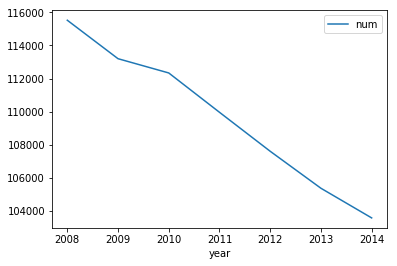

In [39]:
df_all.plot()
plt.show()

Calculate the overall transactions per year for 'PONTOON'

In [40]:
df_p = pd.concat([df[(df.tx_type =='BOAT REG, PONTOON')],df[(df.tx_type =='REN BOAT PONTOON')]])
df_p = df_p.groupby('year').sum()
df_p

,num
year,
2008,2283
2009,2350
2010,2410
2011,2495
2012,2658
2013,2781
2014,2820


Plot the overall transactions per year for 'PONTOON'

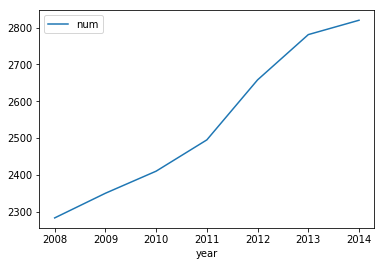

In [41]:
df_p.plot()
plt.show()

In [42]:
df_all['num_of_P'] = df_p['num']
df_all['p_in_all'] =  df_all['num_of_P']/df_all['num']
df_all

,num,num_of_P,p_in_all
year,,,
2008,115520,2283,0.019763
2009,113198,2350,0.020760
2010,112337,2410,0.021453
2011,109962,2495,0.022690
2012,107608,2658,0.024701
2013,105375,2781,0.026391
2014,103584,2820,0.027224


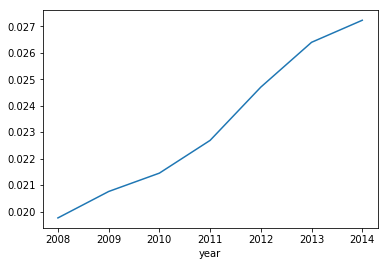

In [43]:
df_all['p_in_all'].plot()
plt.show()

In [44]:
df_i = df.groupby('tx_type').sum()

In [45]:
list_ = df['tx_type'].unique().tolist()
labels = tuple(list_)
sizes = df_i['num'].tolist()
colors = ('gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','green','silver')

The propertion of each type around the year

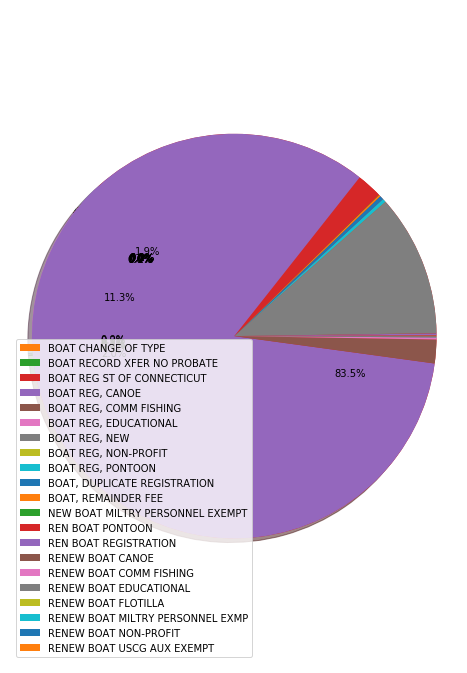

In [46]:
plt.figure(figsize=(8,12))
plt.pie(sizes,
        autopct='%1.1f%%', shadow=True, startangle=140)
patches, texts = plt.pie(sizes,shadow = False)

plt.legend(patches, labels, loc="best")
 
plt.axis('equal')
plt.show()